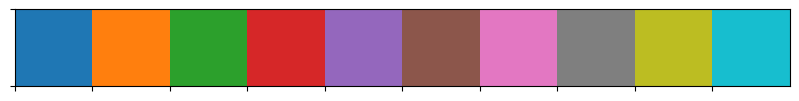

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import skrf as rf
from IPython.display import HTML
import control as ctrl

%matplotlib inline
plt.style.use('default')
plt.style.use('seaborn-paper')
current_palette = sns.color_palette(palette=None)
sns.set_palette(palette=None)
sns.palplot(current_palette)

mpl.rcParams.update({'figure.figsize': (5, 3)})
mpl.rcParams['figure.dpi']= 150

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


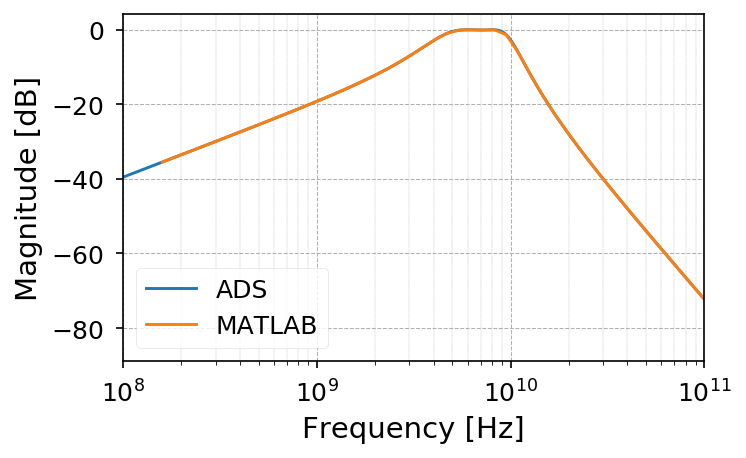

(array([-1.20099484e+10+5.80647920e+10j, -1.20099484e+10-5.80647920e+10j,
        -1.19985734e+10+2.94948112e+10j, -1.19985734e+10-2.94948112e+10j]),
 array([0.]))

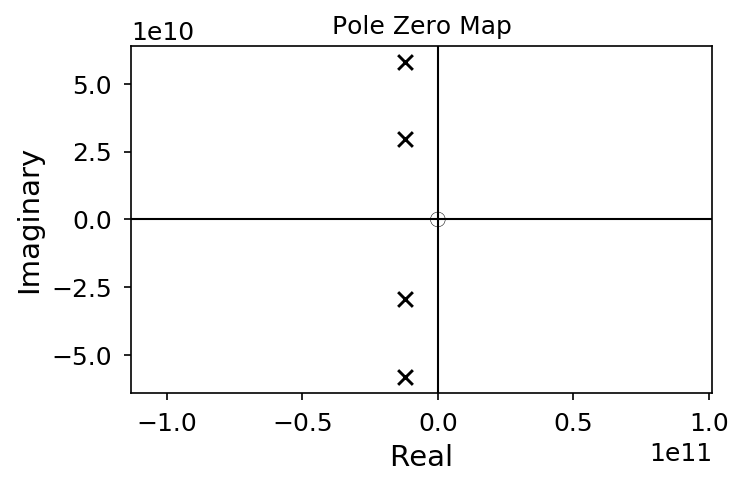

In [9]:
## LC Tank Plot

k = 0.56
C1 = 1.08*10**-12
C2 = 339*10**-15
L1 = 0.61*10**-9
L2 = 1.83*10**-9

R1 = 50
R2 = 100

df_tf_s21 = pd.read_csv('Data/Ads_data/Wideband_matching/S21_plot.txt',sep='\t')
# print(Omega)

num = [k*R1*R2*(L1*L2)**(1/2)*np.sqrt(2), 0]
den = [L1*L2*C1*C2*R1*R2*(1-k**2)*R1, L1*L2*(C1*R1+C2*R2)*(1-k**2)*R1, ((L1*C1+L2*C2)*R1*R2+L1*L2*(1-k**2))*R1, (L2*R1+L1*R2)*R1, R1*R2*R1 ]
sys = ctrl.tf(num,den)
[Mag, Phase, w] = ctrl.bode(sys, Plot=0)

plt.semilogx(df_tf_s21['freq'],df_tf_s21['dB(S(2,1))'], label='ADS')
plt.plot(w/(2*np.pi), 20*np.log10(Mag), label='MATLAB')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.legend()
plt.xlim(10**8,10**11)
plt.show()


ctrl.pzmap(sys)

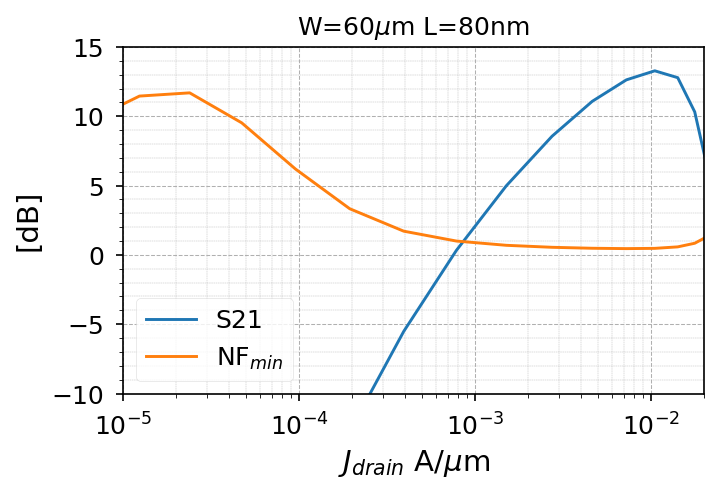

    compressionCurves X  compressionCurves Y
0                   -30           -24.958774
1                   -28           -22.958238
2                   -26           -20.958327
3                   -24           -18.958466
4                   -22           -16.958662
5                   -20           -14.958929
6                   -18           -12.959248
7                   -16           -10.959525
8                   -14            -8.959477
9                   -12            -6.958485
10                  -10            -4.956238
11                   -8            -2.963516
12                   -6            -1.054788
13                   -4             0.651189
14                   -2             2.011953
15                    0             2.892102
16                    2             3.427513
17                    4             3.760934
18                    6             3.971093
19                    8             4.109405
20                   10             4.196231


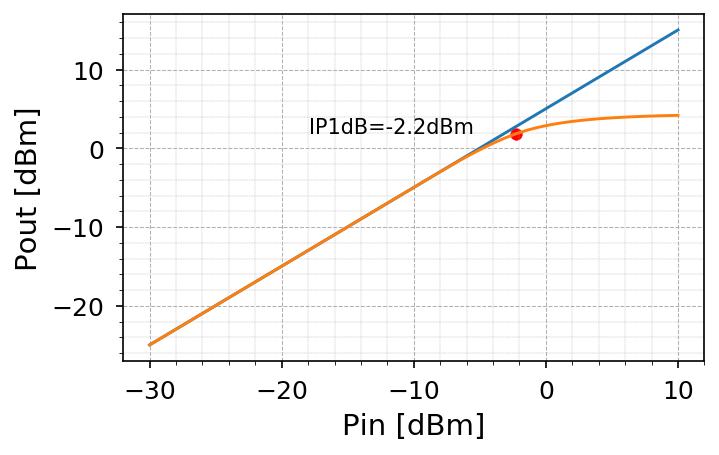

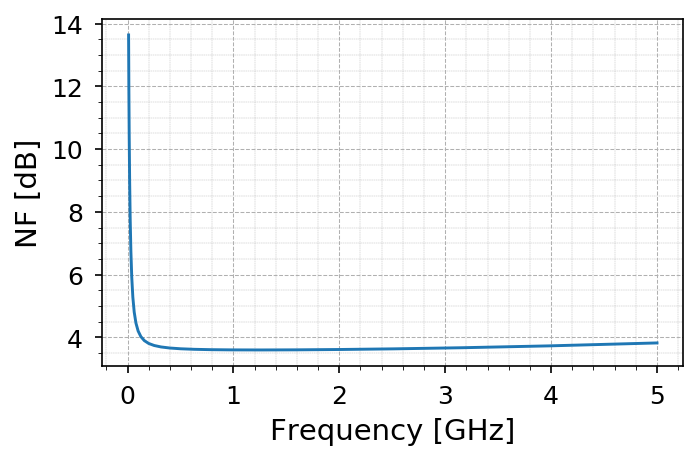

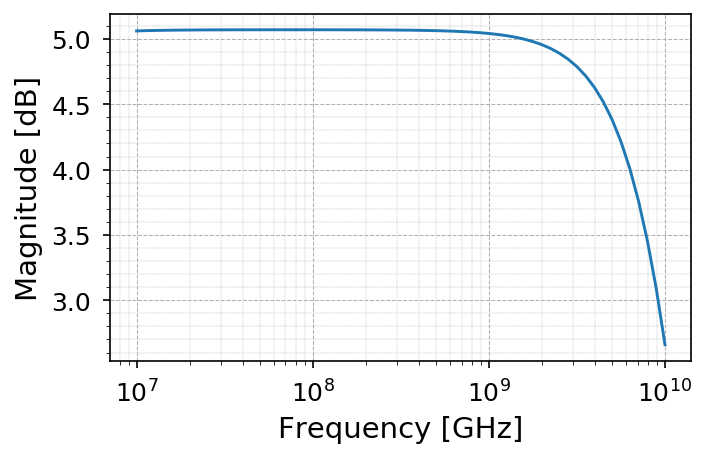

In [47]:
df_NF_S21 = pd.read_csv('Data/Preliminary_Data/Self_design/STG1/NF_min_Vs_Gain.csv',sep=',')


plt.semilogx(df_NF_S21['Id'],df_NF_S21['S21'], label='S21')
plt.semilogx(df_NF_S21['Id'],df_NF_S21['NF'], label='NF$_{min}$')

plt.xlabel('$J_{drain}$ A/$\mu$m')
plt.ylabel('[dB]')
plt.title('W=60$\mu$m L=80nm')
plt.xlim(10**-5,2*10**-2)
plt.ylim(-10,15)
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

#### P1dB     ##########################
df_pin_sweep = pd.read_csv('Data/Cad_sim_data/Buffer_thesis/P1dB.csv',sep=',')
print(df_pin_sweep)

new_length = 50
new_pin = np.linspace(df_pin_sweep['compressionCurves X'].min(), df_pin_sweep['compressionCurves X'].max(), new_length)
new_pout = sp.interpolate.interp1d(df_pin_sweep['compressionCurves X'], df_pin_sweep['compressionCurves Y'], kind='cubic')(new_pin)

m = (new_pout[10] - new_pout[1]) / (new_pin[10] - new_pin[1])
c = new_pout[10] - new_pin[10]*m

p1db_interpolate = m*new_pin + c
diff_p1db = p1db_interpolate - new_pout
# print(diff_p1db[34])
plt.plot(new_pin, p1db_interpolate)
plt.plot(new_pin, new_pout)
plt.scatter(new_pin[34], new_pout[34], color='r')
plt.text(new_pin[34]*(1+7), new_pout[34]*(1) , 'IP1dB=-2.2dBm ', fontsize=10)


plt.xlabel('Pin [dBm]')
plt.ylabel('Pout [dBm]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

# NF ######################
df_NF_Buff = pd.read_csv('Data/Cad_sim_data/Buffer_thesis/NF.csv',sep=',')


plt.plot(df_NF_Buff['noise figure X']/10**9, df_NF_Buff['noise figure Y'])

plt.xlabel('Frequency [GHz]')
plt.ylabel('NF [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

# Gain ########################

df_Gain_Buff = pd.read_csv('Data/Cad_sim_data/Buffer_thesis/S21.csv',sep=',')
plt.semilogx(df_Gain_Buff['S21 dB20 X'], df_Gain_Buff['S21 dB20 Y'])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()




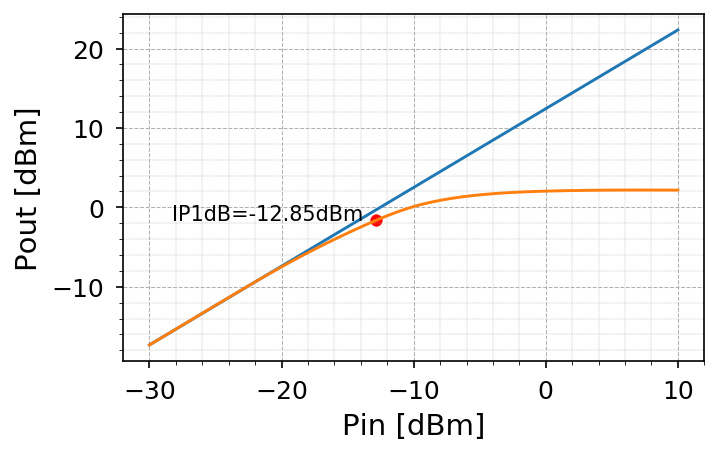

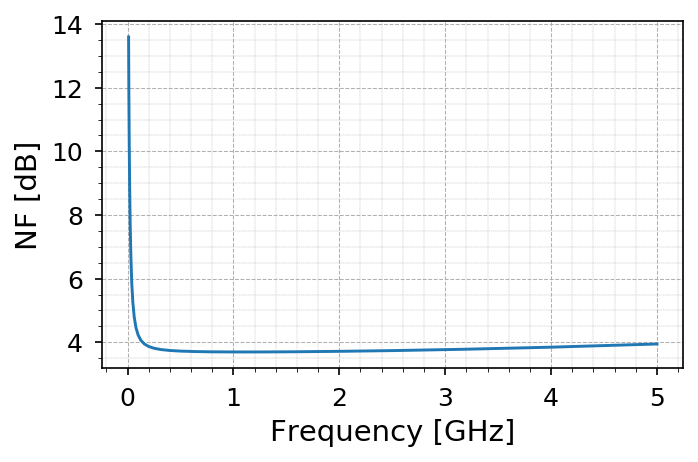

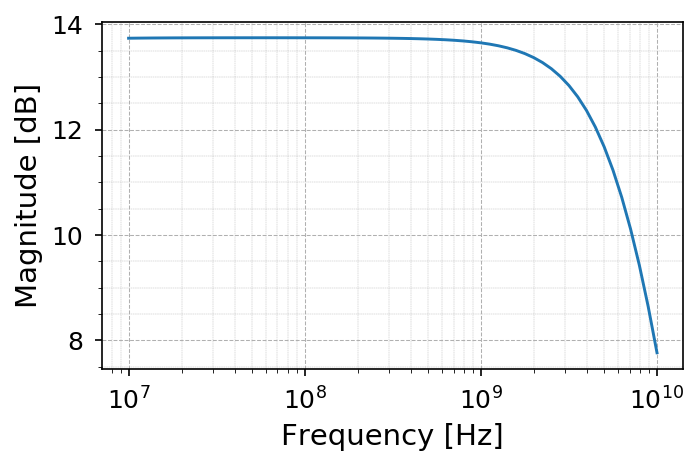

In [50]:
#### P1dB     ##########################
df_pin_sweep = pd.read_csv('Data/Cad_sim_data/IF_amp_thesis/P1dB.csv',sep=',')
# print(df_pin_sweep)

new_length = 50
new_pin = np.linspace(df_pin_sweep['compressionCurves X'].min(), df_pin_sweep['compressionCurves X'].max(), new_length)
new_pout = sp.interpolate.interp1d(df_pin_sweep['compressionCurves X'], df_pin_sweep['compressionCurves Y'], kind='cubic')(new_pin)

m = (new_pout[10] - new_pout[1]) / (new_pin[10] - new_pin[1])
c = new_pout[10] - new_pin[10]*m

p1db_interpolate = m*new_pin + c
diff_p1db = p1db_interpolate - new_pout
# print(diff_p1db)
plt.plot(new_pin, p1db_interpolate)
plt.plot(new_pin, new_pout)
plt.scatter(new_pin[21], new_pout[21], color='r')
plt.text(new_pin[21]*(1+1.2), new_pout[21]*(1) , 'IP1dB=-12.85dBm ', fontsize=10)
# print(new_pin[21])

plt.xlabel('Pin [dBm]')
plt.ylabel('Pout [dBm]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

# NF ######################
df_NF_Buff = pd.read_csv('Data/Cad_sim_data/IF_amp_thesis/NF.csv',sep=',')


plt.plot(df_NF_Buff['noise figure X']/10**9, df_NF_Buff['noise figure Y'])

plt.xlabel('Frequency [GHz]')
plt.ylabel('NF [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

# Gain ########################

df_Gain_Buff = pd.read_csv('Data/Cad_sim_data/IF_amp_thesis/Vdb.csv',sep=',')
plt.semilogx(df_Gain_Buff['v (/Vop_I_test /Vom_I_test); ac dB20(V) X'], df_Gain_Buff['v (/Vop_I_test /Vom_I_test); ac dB20(V) Y'])


plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()
